## Transfer Learning Resnet100


Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import tensorflow as tf
tf.config.run_functions_eagerly(True)

#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = './dataset/train'
valid_path = './dataset/test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

#resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

resnet=ResNet101V2(input_shape=IMAGE_SIZE + [3],include_top=False, weights='imagenet')




171317808/171317808 [==============================] - 30s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('./dataset/train/*')
folders

['./dataset/train\\0',
 './dataset/train\\1',
 './dataset/train\\2',
 './dataset/train\\3',
 './dataset/train\\4',
 './dataset/train\\5',
 './dataset/train\\6',
 './dataset/train\\7',
 './dataset/train\\8',
 './dataset/train\\9']

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:

# view the structure of the model
xx=model.summary()
xx

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('./dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

Found 500 images belonging to 10 classes.


In [14]:
test_set = test_datagen.flow_from_directory('./dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical',shuffle=False)

Found 120 images belonging to 10 classes.


In [15]:
# from PIL import Image 
# Image.MAX_IMAGE_PIXELS = 1000000000 

In [16]:
# tf.data.experimental.enable_debug_mode()

In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\Users\yasha\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/5

50/50 [==============================] - 441s 9s/step - loss: 10.8891 - accuracy: 0.4660 - val_loss: 2.7606 - val_accuracy: 0.7750
Epoch 2/5
50/50 [==============================] - 341s 7s/step - loss: 2.7436 - accuracy: 0.8200 - val_loss: 0.5361 - val_accuracy: 0.9583
Epoch 3/5
50/50 [==============================] - 336s 7s/step - loss: 2.5049 - accuracy: 0.8620 - val_loss: 1.0013 - val_accuracy: 0.9417
Epoch 4/5
50/50 [==============================] - 351s 7s/step - loss: 1.6184 - accuracy: 0.8980 - val_loss: 1.0395 - val_accuracy: 0.9750
Epoch 5/5
50/50 [==============================] - 346s 7s/step - loss: 1.4989 - accuracy: 0.9180 - val_loss: 0.6769 - val_accuracy: 0.9417


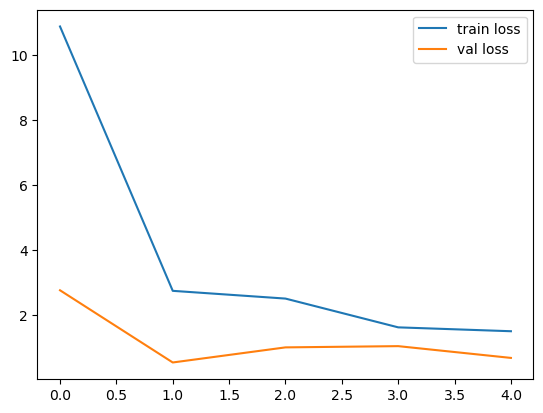

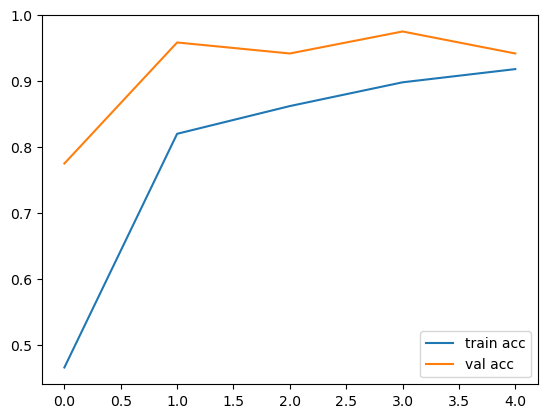

<Figure size 640x480 with 0 Axes>

In [18]:
# plot the loss

import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('foodresenet100.h5')

c:\Users\yasha\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# New Section

In [20]:

y_pred = model.predict(test_set)


c:\Users\yasha\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


12/12 [==============================] - 26s 2s/step


In [21]:
y_pred

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 4.947182e-26,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00]], dtype=float32)

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_true=test_set.classes

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm=confusion_matrix(y_true,y_pred)
cm

array([[12,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 12,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  1,  9,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 12,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 11]], dtype=int64)

In [26]:
from sklearn.metrics import classification_report
cr=classification_report(y_true,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.92      0.96        12
           2       0.86      1.00      0.92        12
           3       1.00      1.00      1.00        12
           4       0.92      1.00      0.96        12
           5       1.00      0.83      0.91        12
           6       0.92      1.00      0.96        12
           7       1.00      0.75      0.86        12
           8       0.92      1.00      0.96        12
           9       1.00      0.92      0.96        12

    accuracy                           0.94       120
   macro avg       0.95      0.94      0.94       120
weighted avg       0.95      0.94      0.94       120



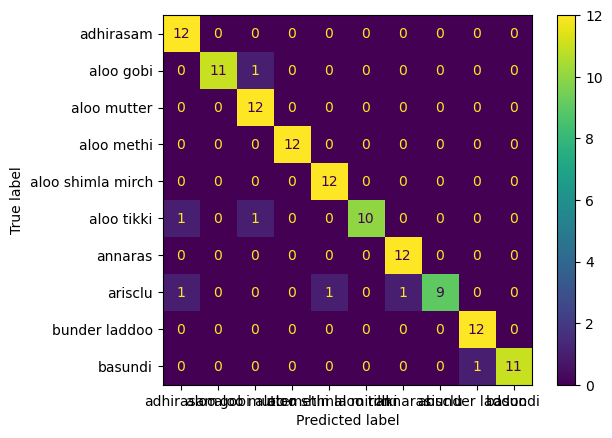

In [27]:

from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['adhirasam','aloo gobi','aloo mutter','aloo methi','aloo shimla mirch','aloo tikki','annaras','arisclu','bunder laddoo','basundi'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()